In [1]:
import sqlalchemy
import pandas as pd

engine = sqlalchemy.create_engine('sqlite:///database.db')
df = pd.read_sql('SELECT * FROM items_large;', engine)

In [2]:
df_nba = df[df["id"] == 58]
df_nba["curr_price"].unique()

df_nba["curr_price"]

465     -100.00
561       39.99
657       39.99
753     -100.00
849     -100.00
          ...  
14093     57.99
14188     59.99
14283     59.08
14378     59.08
14473     59.08
Name: curr_price, Length: 147, dtype: float64

In [58]:
pos_filt = df_nba["curr_price"] > 0
prices = df_nba[pos_filt].loc[:, ["timestp", "curr_price"]]

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
import io
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

<Response 31913 bytes [200 OK]>

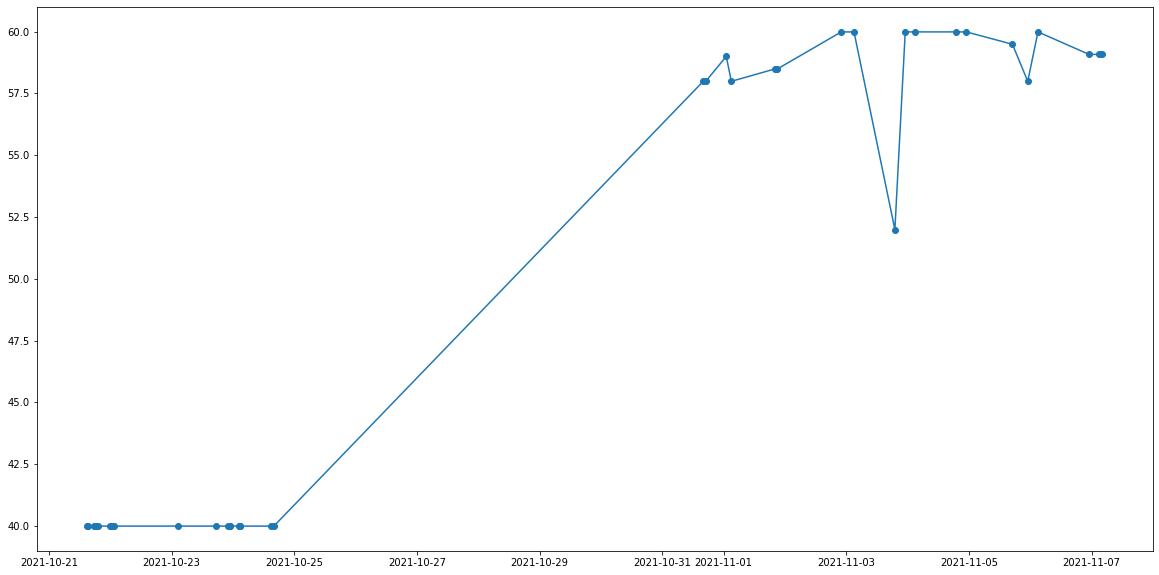

In [71]:
import matplotlib.dates as mdates
from flask import Response
prices["timestp"] = prices["timestp"].astype('datetime64')
fig, ax = plt.subplots(figsize=(30, 20))

ax.plot(prices.timestp, prices.curr_price, "-o")

output = io.BytesIO()
FigureCanvas(fig).print_png(output)
Response(output.getvalue(), mimetype='image/png')


In [46]:
prices.timestp.astype('datetime64')[561].date()

datetime.date(2021, 10, 21)

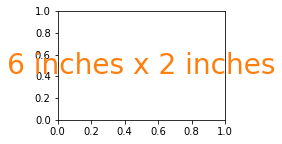

In [22]:
text_kwargs = dict(ha='center', va='center', fontsize=28, color='C1')
plt.subplots(figsize=(3, 2))
plt.text(0.5, 0.5, '6 inches x 2 inches', **text_kwargs)
plt.show()

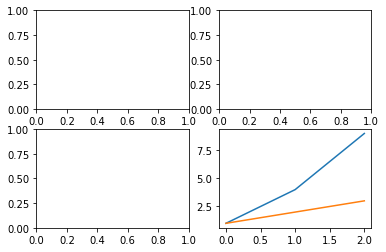

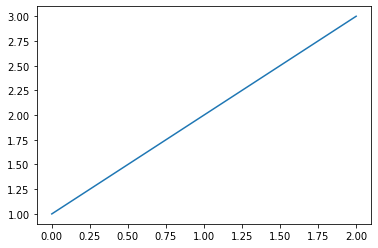

In [38]:
plt.plot([1, 2, 3])